# **Aprendizaje no supervisado**
# UL02. Algoritmo K-means

## <font color='blue'>**Algoritmo K-Means**</font>

Modelos de aprendizaje automático no supervisados: **algoritmos de agrupamiento**. Los algoritmos de agrupamiento buscan aprender, a partir de las propiedades de los datos, una división óptima o etiquetado discreto de grupos de puntos.

Muchos algoritmos de agrupación en clústeres están disponibles en Scikit-Learn, pero quizás el más simple de entender es un algoritmo conocido como **k-means**, que se implementa en *sklearn.cluster.KMeans*.

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import warnings

El algoritmo k-means busca un número predeterminado de clústeres dentro de un conjunto de datos multidimensionales sin etiquetar. Lo logra utilizando una concepción simple de cómo se ve la agrupación óptima:

* El "centro del grupo" es la media aritmética de todos los puntos que pertenecen al grupo.

* Cada punto está más cerca de su propio centro de grupo que de otros centros de grupo.

Estos dos supuestos son la base del modelo k-means.

## El Algoritmo

1. Seleccionar de forma aleatoria $k$ centroides $C = \{c_1, c_2, \dots, c_k\}$ de los puntos de datos $X = \{x_1, x_2, \dots, x_n\} \in \mathbb{R}^D $.
2. Para cada observación $x_i$, se calcula la suma de errores al cuadrado de esa observación respecto a cada uno de los $k$ centroides, $ D(x_i, c_j) = \displaystyle\sum_{i=1}^{n}{\| x_i - c_j \|^2}$.
3. A cada observación se le asigna el centroide que menos error tenga.
4. Calcular la diferencia entre el antiguo y el nuevo centroide y repetir los pasos 2 y 3 si la diferencia es menor que un umbral (convergente).

In [14]:
# Librerías necesarias
from IPython.display import display
from sklearn import metrics
from sklearn.datasets import make_blobs, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

warnings.filterwarnings('ignore')
%matplotlib inline

Primero, generemos un conjunto de datos bidimensional que contiene tres "grupos" distintos. Para enfatizar que este es un algoritmo no supervisado, dejaremos las etiquetas fuera de la visualización (todos los puntos tendrán el mismo color).

In [15]:
# Generamos la data simulada
X, y = make_blobs(n_samples=5000,
                  n_features=2,
                  centers=3,
                  random_state=170)

display(X)
display(y)

array([[-4.01009423, -1.01473496],
       [ 1.00550526,  0.13163222],
       [ 2.06563121, -0.24527689],
       ...,
       [-5.09493013,  1.47160372],
       [-9.61459714, -4.91848716],
       [-7.72675795, -5.86656563]])

array([1, 2, 2, ..., 1, 0, 0])

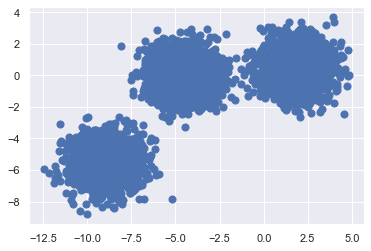

In [16]:
plt.scatter(X[:, 0], X[:, 1], s=50)

A simple vista, es relativamente fácil distinguir los tres (3) grupos. El algoritmo k-means hace esto automáticamente.

In [17]:
""" K-means clustering algorithm.

Parameters
----------
n_init: int, optional, default: 10
        Number of time the k-means algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of inertia.
        
init: {'k-means++', 'random', or ndarray, or a callable}, optional
        Method for initialization, default to 'k-means++'.
        
        'k-means++': selects initial cluster centers for k-mean
        clustering in a smart way to speed up convergence.
        
        'random': generate k centroids from a Gaussian with mean and
        variance estimated from the data.

tol: float, default: 1e-4
        Relative tolerance with regards to inertia to declare convergence
        tolerance is computed using `np.mean(np.var(X, axis=0)) * tol)`

"""

kmeans = KMeans(n_clusters=3,
                n_init=3,
                init='random',
                tol=1e-4, 
                random_state=170,
                verbose=True)
kmeans.fit(X)

Initialization complete
Iteration 0, inertia 93044.0459798316
Iteration 1, inertia 11941.891546455781
Iteration 2, inertia 9733.270749140673
Converged at iteration 2: center shift 6.990341405572932e-05 within tolerance 0.0014634111435935595.
Initialization complete
Iteration 0, inertia 49491.22189277586
Iteration 1, inertia 43229.84746448651
Iteration 2, inertia 42926.50675387755
Iteration 3, inertia 42574.50264772261
Iteration 4, inertia 41999.15634451153
Iteration 5, inertia 39853.96747003668
Iteration 6, inertia 28163.26111191373
Iteration 7, inertia 11338.224620471
Iteration 8, inertia 9733.782646928288
Converged at iteration 8: center shift 0.00037711054168381445 within tolerance 0.0014634111435935595.
Initialization complete
Iteration 0, inertia 35757.30266790029
Iteration 1, inertia 10003.82395739983
Iteration 2, inertia 9733.154277459318
Converged at iteration 2: strict convergence.


KMeans(init='random', n_clusters=3, n_init=3, random_state=170, verbose=True)

In [18]:
# Predicciones y los centros de los clusters (centroides).
display(kmeans.labels_)
display(kmeans.cluster_centers_)

array([1, 2, 2, ..., 1, 0, 0])

array([[-8.94710203, -5.51613184],
       [-4.55676387,  0.04603707],
       [ 1.89450492,  0.5009336 ]])

Visualizaremos los resultados trazando los datos coloreados por estas etiquetas. También trazaremos los centros de los grupos según lo determinado por el estimador de k-means:

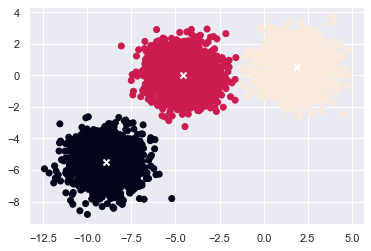

In [19]:
# Graficar predicciones
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            c='w', marker='x', linewidths=2)

El algoritmo de k-means (al menos en este caso simple) asigna los puntos a los grupos de manera muy similar a como podríamos asignarlos a simple vista.

Podemos hacer nuevas predicciones sin volver a ejecutar k-means (simplemente encontrando los centroides más cercanos).

In [20]:
X_new = np.array([[10,10], [-10, -10], [-5, 10]])
y_pred = kmeans.predict(X_new)

""" El siguiente código es equivalente a:
y_pred = KMeans(...).fit_predict(X), pero este necesita entrebar k-means nuevamente.
"""

display(y_pred)

array([2, 0, 1])

Podemos obtener las distancias desde un punto hasta cada centroide

In [21]:
""" El siguiente código es equivalente a:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(X_new, kmeans.cluster_centers_)
"""

kmeans.transform(X_new)

array([[24.48965134, 17.63464636, 12.48724601],
       [ 4.60582976, 11.42592142, 15.86659553],
       [16.01030799,  9.96382639, 11.73739582]])

## <font color='blue'>**Algoritmo de Maximización de Expectativas**</font>

El algoritmo de maximización de expectativas (E–M) es un método iterativo para encontrar estimaciones de máxima verosimilitud (local) o máximas a posteriori (MAP) de parámetros en modelos estadísticos, donde el modelo depende de variables latentes no observadas. La iteración E-M alterna entre realizar un paso de expectativa (E), que crea una función para la expectativa de la probabilidad logarítmica evaluada utilizando la estimación actual de los parámetros, y un paso de maximización (M), que calcula los parámetros que maximizan el logaritmo esperado, probabilidad encontrada en el paso E. Estas estimaciones de parámetros se utilizan luego para determinar la distribución de las variables latentes en el siguiente paso E.

<img src='https://drive.google.com/uc?export=view&id=1wqQei54be46mSBLbzbYkYY_Xp4crk4V6' width="500" align="center" style="margin-right: 20px">

K-means es una aplicación del algoritmo E-M particularmente simple y fácil de entender. En resumen, el enfoque de maximización de expectativas consiste en el siguiente procedimiento:

1. Adivina algunos centros de clústeres:

2. Repetir hasta converger:
  * E-Step: asigna puntos al centro del clúster más cercano
  * M-Step: establece los centros del clúster en la media

El "paso E" o "paso de expectativa" se llama así porque implica actualizar nuestra expectativa de a qué grupo pertenece cada punto. El "paso M" o "paso de maximización" se llama así porque implica maximizar alguna función de aptitud que define la ubicación de los centros del grupo; en este caso, la maximización se logra tomando una media simple de los datos en cada grupo .

La literatura sobre este algoritmo es amplia, pero se puede resumir de la siguiente manera: en circunstancias típicas, cada repetición del paso E y del paso M siempre dará como resultado una mejor estimación de las características del conglomerado.

El algoritmo k-means es lo suficientemente simple como para que podamos escribirlo en unas pocas líneas de código usando la definición del algoritmo E-M. La siguiente es una implementación muy básica:

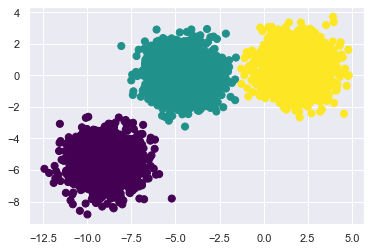

In [22]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Selección aleatoria de cluster
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. asignación de label basado en centro más cercano
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. encontrar nuevo centro por promedio
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Chequear convergencia
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## Mejor Inicialización de los Centroides 

El resultado del algoritmo de K-means depende en gran medida de la inicialización de los centroides. Si esta inicialización no es buena, se puede converger a un mínimo local. Se puede abordar este problema configurando **init='kmeans++'** en vez de 'random'. K-means++ inicializa los centroides de una manera más inteligente para acelerar la convergencia. El algoritmo general opera de la siguiente manera:

1. Seleccionar aleatoriamente un centroide de los puntos de datos.
2. Para cada punto $x_i$, calcular la distancia $D(x_i, c_j)$ donde $c_j$ es el más cercano a $x_i$.
3. Seleccionar aleatoriamente un nuevo punto de datos como un nuevo centroide usando *weighted probability distribution* que sea proporcional a $D(x_i, c_j)^2$.
4. Repita los pasos 2 y 3 hasta que se hayan elegido $k$ centroides.
5. Una vez inicializados los centroides, ejecutar el algoritmo * K-means *.

In [23]:
# Perform K-means++ on our data.
kmeans_plus_plus = KMeans(n_clusters=3,
                n_init=3,
                init='k-means++',
                tol=1e-4, 
                random_state=170,
                verbose=True).fit(X)

Initialization complete
Iteration 0, inertia 14504.163838606168
Iteration 1, inertia 9735.744827760524
Iteration 2, inertia 9733.16763519942
Converged at iteration 2: center shift 8.017874814669884e-06 within tolerance 0.0014634111435935595.
Initialization complete
Iteration 0, inertia 10751.00184893979
Iteration 1, inertia 9733.46196513724
Converged at iteration 1: center shift 0.00012717967226944895 within tolerance 0.0014634111435935595.
Initialization complete
Iteration 0, inertia 12316.398205045787
Iteration 1, inertia 9733.520322362505
Converged at iteration 1: center shift 0.00016219913816600806 within tolerance 0.0014634111435935595.


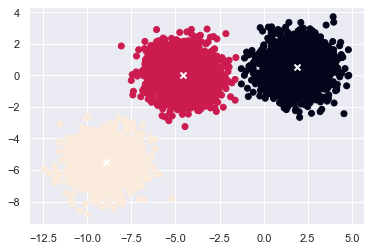

In [24]:
# Plot the predictions.
plt.scatter(X[:,0], X[:,1], c=kmeans_plus_plus.labels_)
plt.scatter(kmeans_plus_plus.cluster_centers_[:,0], 
            kmeans_plus_plus.cluster_centers_[:,1], 
            c='w', marker='x', linewidths=2)

## <font color='green'>Actividad 1</font>

Realizar la agrupación de los jugadores de la Liga Española de fútbol en función de sus características de juego utilizando K-means. Los clusters deben corresponder a: portero, defensa, mediocampista (central) y delantero (recuerde que esto es información de apoyo ya que estamos trabajando con aprendizaje no supervisado). El objetivo es verificar si las diferentes clusterizaciones que el algoritmo realiza son coherentes con las dinámicas del fútbol y con los jugadores asociados.

Los datos disponibles para la realización del modelo se encuentran en el archivo **laLiga.csv**. Para mejorar la performance del sistema implementado y facilitar la visualización de los datos, debe considerar sólo los jugadores con más de 2000 minutos de juego.

1. Realice un análisis inicial de los datos.
2. Realice manejo de datos faltantes (si corresponde).
3. Recuerde eliminar la etiqueta de los datos de su vector de entrenamiento.
4. Selecciones las variables para su modelo. Se recomienda la realización de una matriz de correlación.
5. Normalice sus datos.
6. Aplique PCA para reducir la dimensionalidad de sus datos y poder visualizar su modelo en 2D.

```
Hint:

# genera el PCA para generar el modelo
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

#donde X_norm es su data normalizada
```
7. Implemente su modelo K-means.
8. Grafique sus resultados.




In [100]:
# 1.- Realice un análisis inicial de los datos.

import pandas as pd

df = pd.read_csv("C:/Users/tarto/rlalfaro_data/Diplomado UDD/6.Aprendizaje-no-Supervisado/laliga.csv", sep =",")

# 2.- Manejo de NaN/Null
print(f'NaN Check: {df.isnull().values.any()}')
print(f'Dataframe Shape: {df.shape}')

df.head()

NaN Check: False
Dataframe Shape: (299, 40)


,Jugador,categoria,Partidos,Minutos_jugados,Goles,Asistencias,Paradas,Goles_encajados,Tiros,Tiros_a_ puerta,...,Errores_en_gol_en_contra,Regates_con_exito,Pasesconexito,Precisionpases,Cornerscolgados,Faltascolgadas,Faltascolgadasprecisas,Faltas directas,Faltasdirectasapuerta,Golesdefalta
0,Eden Hazard,3,11,803,1,2,0,0,13,9,...,0,39,15,86,1,0,0,0,0,0
1,Adnan Januzaj,3,17,804,2,3,0,0,19,5,...,0,20,17,68,11,3,0,2,0,0
2,Pione Sisto,3,20,804,2,0,0,0,27,14,...,1,24,9,83,12,6,1,1,0,0
3,Alfonso Pedraza,2,13,808,0,0,0,0,9,300,...,0,13,700,75,0,0,0,0,0,0
4,Jeison Murillo,2,9,810,0,0,0,0,2,100,...,0,1,0,83,0,2,0,0,0,0


In [101]:
# 3.- Quitar etiquetas de jugador

df_x = df.drop(columns=["categoria","Jugador"])

In [102]:
# 4.- Selecciones las variables para su modelo. Se recomienda la realización de una matriz de correlación.

from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure

figure(figsize=(20,20))
mat = df.corr()
# mat[mat['categoria'] > 0.3]['categoria'].append(mat[mat['categoria'] < -0.3]['categoria'])
column_drops = mat[ (mat['categoria'] < 0.3) & (mat['categoria'] > -0.3) ]['categoria'] # Categorias para eliminar

<Figure size 1440x1440 with 0 Axes>

In [103]:
column_drops.index

Index(['Partidos', 'Minutos_jugados', 'Centros', 'Centros_ precisos',
       'Precision_centros', 'Pases_interceptados', 'Balones_robados',
       'Balones_robado al_ultimo_hombre', 'Tarjetas_amarillas',
       'Tarjetas_rojas', 'Penaltis_cometidos', 'Penaltis_forzados',
       'Penaltis_anotados', 'Goles_en_propia_meta', 'Tiros_bloqueados',
       'Precisionpases', 'Cornerscolgados', 'Faltascolgadas',
       'Faltascolgadasprecisas', 'Faltas directas', 'Faltasdirectasapuerta',
       'Golesdefalta'],
      dtype='object')

In [104]:
df_x = df_x.drop(columns=column_drops.index)

In [105]:
df_x

,Goles,Asistencias,Paradas,Goles_encajados,Tiros,Tiros_a_ puerta,Precision_tiros,Tiros_al palo,Corners_forzados,Faltas_recibidas,Faltas_cometidas,Penaltis_lanzados,Penaltis_parados,Errores_en_gol_en_contra,Regates_con_exito,Pasesconexito
0,1,2,0,0,13,9,69,0,11,38,12,0,0,0,39,15
1,2,3,0,0,19,5,26,0,8,25,18,0,0,0,20,17
2,2,0,0,0,27,14,52,0,9,26,8,0,0,1,24,9
3,0,0,0,0,9,300,33,0,6,14,10,0,0,0,13,700
4,0,0,0,0,2,100,50,0,1,10,11,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,4,0,0,9,200,22,0,31,21,14,0,0,0,30,4600
295,0,0,128,41,0,0,0,0,1,4,0,0,2,1,0,1
296,0,0,58,27,0,0,0,0,1,0,1,0,1,2,0,0
297,0,0,72,34,0,0,0,0,1,1,0,0,0,3,0,1


<AxesSubplot:>

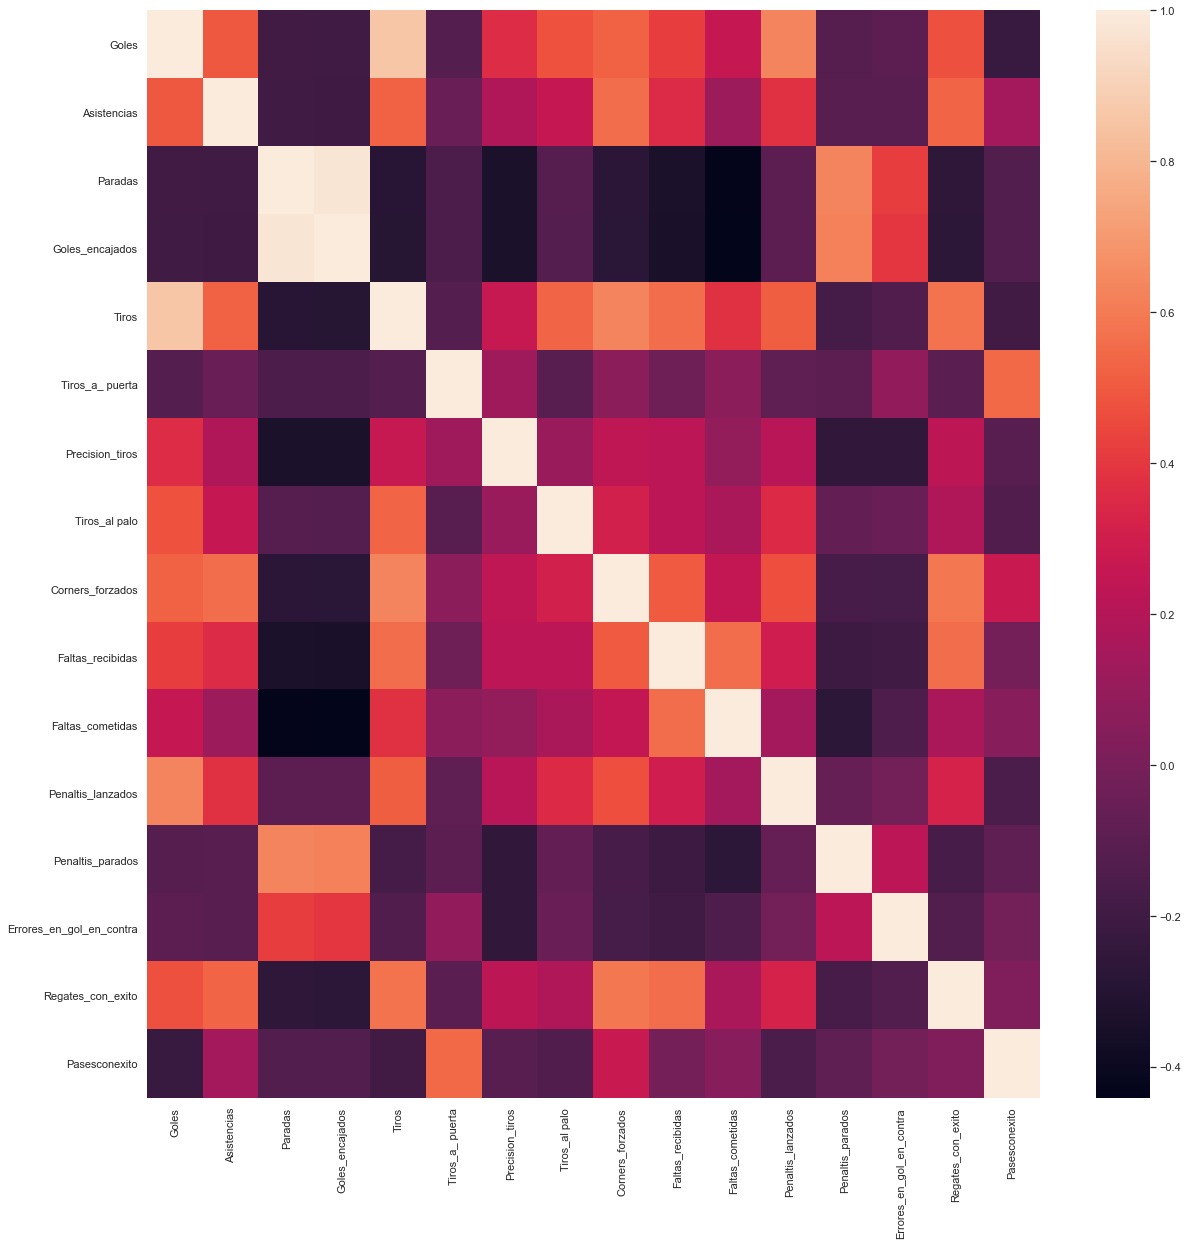

In [106]:
figure(figsize=(20,20))
mat = df_x.corr()
sns.heatmap(mat)

In [107]:
# 5.- Normalice sus datos.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = scaler.fit_transform(df_x)

In [108]:
# 6.- Aplique PCA para reducir la dimensionalidad de sus datos y poder visualizar su modelo en 2D.

from sklearn.decomposition import PCA

PCA = PCA(n_components = 2)
reduced = pd.DataFrame(PCA.fit_transform(X_norm))

In [109]:
# 7.- Implemente su modelo K-means.
from sklearn.cluster import KMeans as Kmeans

# class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, 
#       tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')[source]

model = Kmeans(n_clusters=4, # 4 tipos de jugadores: portero, defensa, mediocampista (central) y delantero.
              n_init=3, 
              init="k-means++",
              tol=0.0001,
              verbose=True).fit(reduced)

Initialization complete
Iteration 0, inertia 423.2840435749773
Iteration 1, inertia 396.63522952682166
Iteration 2, inertia 395.67953482100273
Iteration 3, inertia 393.2682291004886
Iteration 4, inertia 391.8517549927737
Iteration 5, inertia 391.3615509809817
Iteration 6, inertia 391.2291918580574
Converged at iteration 6: center shift 0.00019366342170077912 within tolerance 0.0003900940207397652.
Initialization complete
Iteration 0, inertia 680.234040039393
Iteration 1, inertia 530.3700385170754
Iteration 2, inertia 487.3692611123024
Iteration 3, inertia 447.9051394548421
Iteration 4, inertia 426.06600308696756
Iteration 5, inertia 414.88101684718845
Iteration 6, inertia 409.44278655807693
Iteration 7, inertia 404.91888430976474
Iteration 8, inertia 398.66510937545206
Iteration 9, inertia 392.61611695344834
Iteration 10, inertia 391.5194314007256
Iteration 11, inertia 391.38484006115834
Converged at iteration 11: center shift 0.00029692042934576955 within tolerance 0.00039009402073976

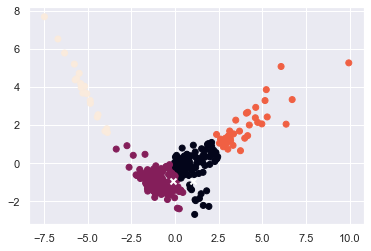

In [115]:
# 8.-  Grafique sus resultados.

plt.scatter(reduced[0], reduced[1], c = model.labels_)
plt.scatter(model.cluster_centers_[0],
            model.cluster_centers_[1],
            c='w', marker='x', linewidths=2)

<font color='green'>Fin Actividad 1</font>

## <font color='blue'>**Problemas de K-means**</font>

Hay algunos problemas que se deben tener en cuenta al utilizar el algoritmo K.means y en general para los algoritmos que implementan el algoritmo de maximización de expectativas.

### Es posible que no se logre el resultado globalmente óptimo

Primero, aunque se garantiza que el procedimiento E–M mejorará el resultado en cada paso, no hay garantía de que conduzca a la mejor solución global.

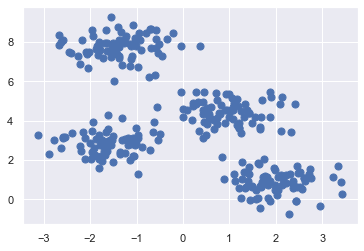

In [199]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

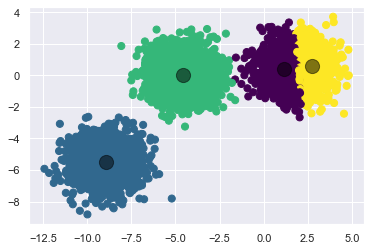

In [117]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Por ejemplo, si usamos una semilla aleatoria diferente en nuestro procedimiento simple, las suposiciones iniciales particulares conducen a resultados pobres:

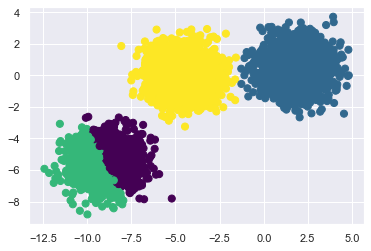

In [118]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Aquí el enfoque E–M ha convergido, pero no ha convergido a una configuración globalmente óptima. Por esta razón, es común que el algoritmo se ejecute para múltiples suposiciones iniciales, como de hecho lo hace Scikit-Learn por defecto (establecido por el parámetro *n_init*, que por defecto es 10).

### El número de clústeres debe seleccionarse de antemano

Otro desafío común con k-means es que debe decirle cuántos grupos espera: no puede aprender el número de grupos a partir de los datos. Por ejemplo, si le pedimos al algoritmo que identifique seis grupos, procederá y encontrará los mejores seis grupos:

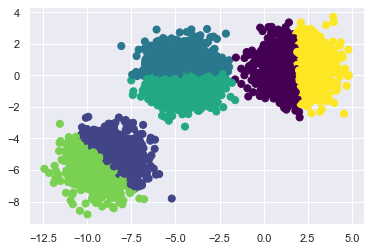

In [119]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Solución: Medir la calidad de los clusters para determinar el número de clusters

#### Método supervisado

**Homogeneity**: Cada cluster contiene solo miembros de una única clase.

**Completeness**: Todos los miembros de una clase determinada están asignados al mismo grupo.

#### Método no supervisado

**Sihouette Coefficient**: Evaluar que tan **compacto** (compactness) y **separados** (separation) están los clusters. Utilizando el método de *Sihouette Coefficient*, podemos encontrar el número óptimo de clusters.

* **Paso 1**: $ a(x_i) $ denota la **distancia media intra-cluster**. Evalúa que tan compacto es el cluster al que pertenece $x_i$. Mientras más pequeño, más compacto.

$$ a(x_i) = \frac{ \sum_{x_k \in C_j ,\ k \neq i}{D(x_i, x_k)} }{\left\vert C_j \right\vert - 1} $$  

para el punto $x_i$, calcular su distancia promedio a todos los otros puntos de su cluster.

* **Paso 2**: $ b(x_i) $ define la **distancia media al cluster más cercano**. Evalúa como $x_i$ se separa de los otros clusters. Mientras más grande, más separado.

$$ b(x_i) = \min_{C_j :\ 1 \leq j \leq k ,\ x_i \notin C_j} \left\{ \frac{ \sum_{x_k \in C_j}{D(x_i, x_k)} }{\left\vert C_j \right\vert } \right\} $$

Para el punto $x_i$ y para todos los otros clusters que no contengan a $x_i$, calcular su distancia promedi a todos los demás puntos en los otros clusters. Encontrar el valor de la distancia mínima con respecto a los otros clusters. 

* **Paso 3**: Finalmente, el *Silhouette Coefficient* es:
 $$ s(x_i) = \displaystyle\frac{b(x_i) - a(x_i)}{\max\{a(x_i), b(x_i)\}},\ -1 \leq s(x_i) \leq 1 $$
donde $a(x_i) \lt b(x_i)$ y $a(x_i) \to 0$ para $s(x_i) \to 1$.

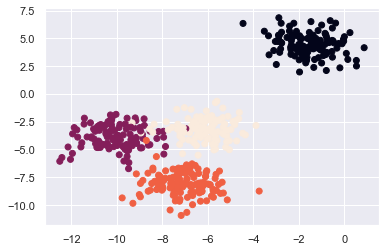

In [120]:
# Generar la data
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

# Plot the data distribution.
plt.scatter(X[:,0], X[:,1], c=y)

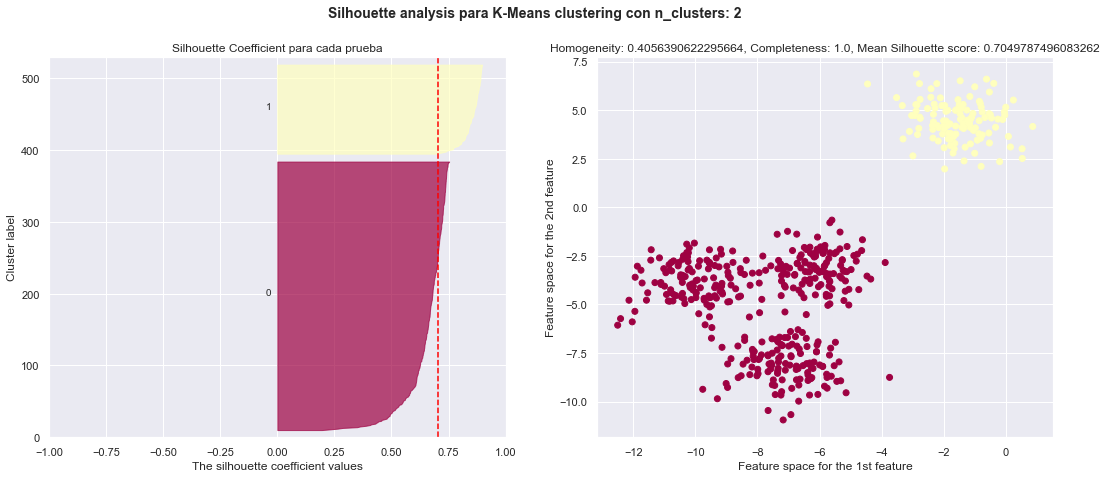

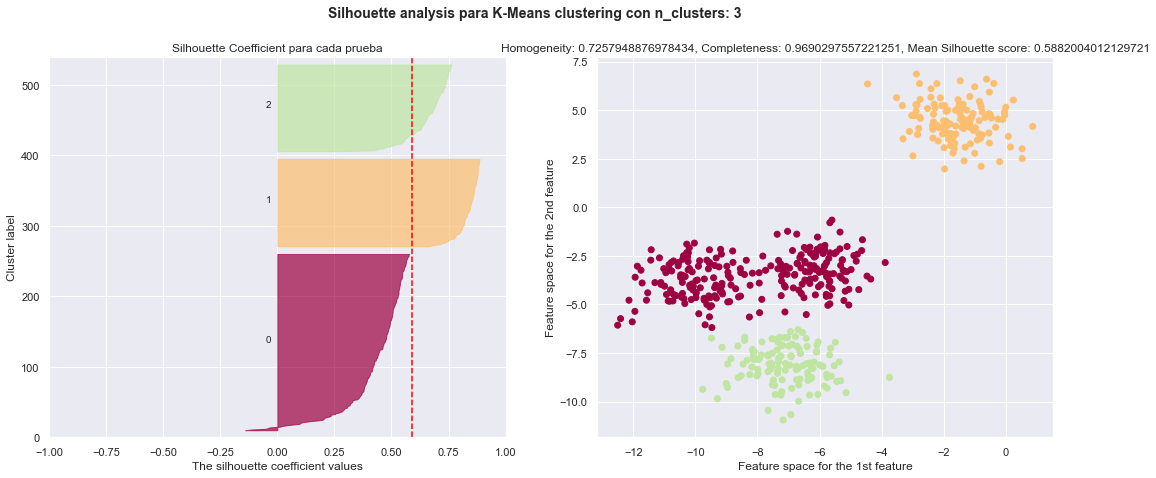

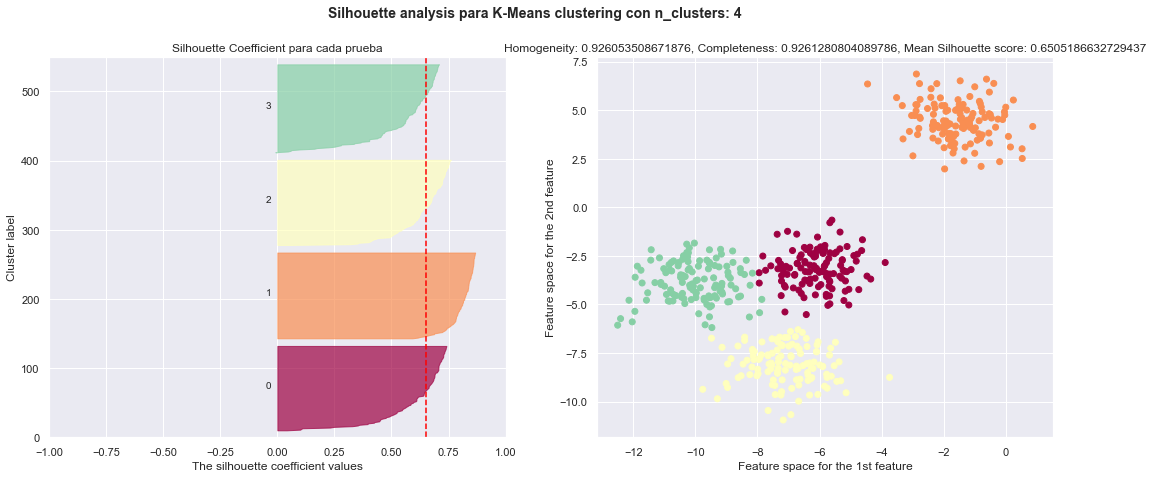

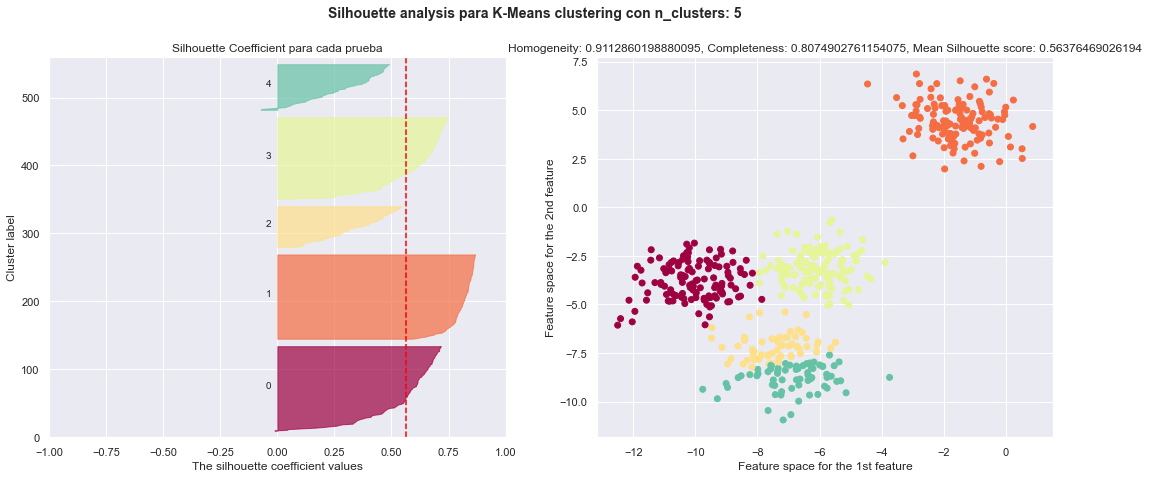

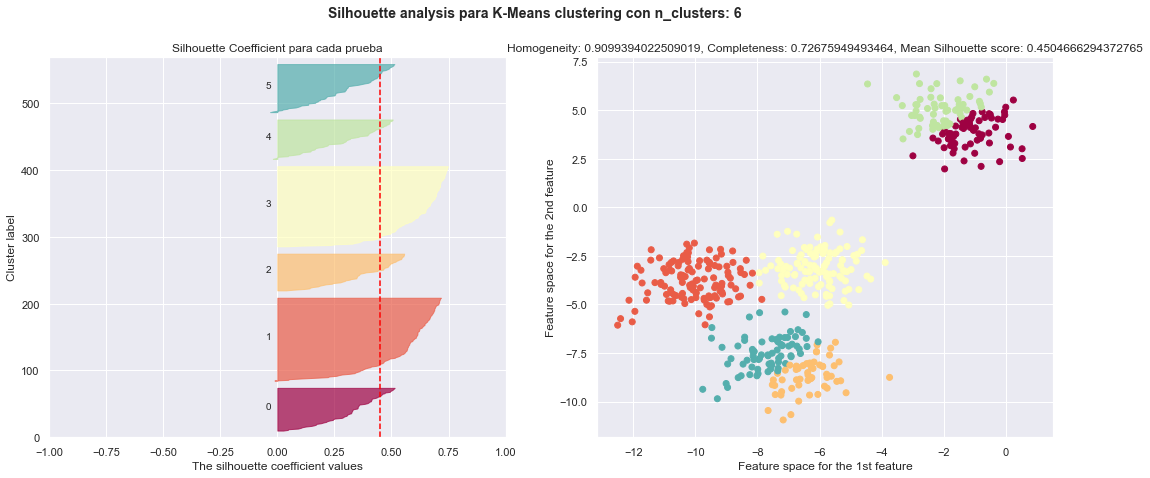

In [121]:
# Lista con el número de clusters a probar.
range_n_clusters = [2, 3, 4, 5, 6]

# para cada cluster, realizar el análisis de Silhouette y visualizar los resultados.
for n_clusters in range_n_clusters:
    
    # Entrenar K-means.
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    y_pred = kmeans.fit_predict(X)
    
    # Calcular la homogeneity y el completeness.
    homogeneity = metrics.homogeneity_score(y, y_pred)
    completeness = metrics.completeness_score(y, y_pred)
    
    # Calcular el Silhouette Coefficient para cada ejemplo.
    s = metrics.silhouette_samples(X, y_pred)
    
    # Calcular el Silhouette Coefficient promedio para todos los puntos.
    s_mean = metrics.silhouette_score(X, y_pred)
    
    # Gráficos -----------------------------------------------------------------------------------
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Configure plot.
    plt.suptitle('Silhouette analysis para K-Means clustering con n_clusters: {}'.format(n_clusters),
                 fontsize=14, fontweight='bold')
    
    # Configure 1st subplot.
    ax1.set_title('Silhouette Coefficient para cada prueba')
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Configure 2st subplot.
    ax2.set_title('Homogeneity: {}, Completeness: {}, Mean Silhouette score: {}'.format(homogeneity,
                                                                                        completeness,
                                                                                        s_mean))
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    # For 1st subplot ------------------------------------------------------------------------------------------
    
    # Plot Silhouette Coefficient for each sample
    y_lower = 10
    for i in range(n_clusters):
        ith_s = s[y_pred == i]
        ith_s.sort()
        size_cluster_i = ith_s.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_s,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
        
    # Plot the mean Silhouette Coefficient using red vertical dash line.
    ax1.axvline(x=s_mean, color="red", linestyle="--")
    
    # For 2st subplot -------------------------------------------------------------------------------------------
    
    # Plot the predictions
    colors = cm.Spectral(y_pred.astype(float) / n_clusters)
    ax2.scatter(X[:,0], X[:,1], c=colors)

El gráfico de silueta muestra que los valores de *n_clusters* 3, 5 y 6 son malas elecciones debido a la presencia de clusters con puntuaciones de silueta por encima del promedio y también debido a amplias fluctuaciones en el tamaño de los gráficos de silueta. Por otro lado, el análisis de silueta presenta mejores resultados al decidir entre 2 y 4 clusters ya que el tamaño de los gráficos de silueta son más parecidos entre grupos y todos se encuentran en torno al valor promedio. Por otro lado, las medidas de homogeneidad y completitud presentan sus mejores resultados para 4 clusters.

Alternativamente a k-means, se pueden utilizar algoritmos de agrupación más complicados que tengan una mejor medida cuantitativa de la aptitud por número de agrupaciones, por ejemplo, modelos gaussian mixture, o que pueda elegir un número adecuado de agrupaciones en forma automática, por ejemplo, DBSCAN, cambio medio o propagación por afinidad, entre otros.

## Dificultad en el manejo de datos ruidos o con valores atípicos (outliers)

K-means tiene dificultad para manejar datos ruidosos o valores atípicos. En la siguiente gráfica se puede observar fácilmente que aunque hay datos que están relativamente lejos de los centroides, k-means de igual manera le asocia algún grupo.

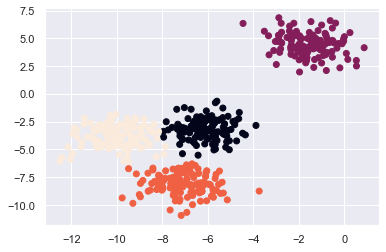

In [122]:
# Generar la data
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

# Perform k-means with n_clusters=4
kmeans = KMeans(n_clusters=4, random_state=10)
y_pred = kmeans.fit_predict(X)

# Plot the prediction
plt.scatter(X[:,0], X[:,1], c=y_pred)

### Solución: Utilizar un umbral de distancia para detectar datos de ruido y valores atípicos

Podemos detectar ruido o valores atípicos si la distancia entre un punto $x_i$ y el centroide $c_j$ del cluster correspondiente al punto $x_i$ es mayor que la distancia primedio en el cluster. Es decir:

$$
\begin{equation}
  x_i=\left\{
  \begin{array}{@{}ll@{}}
    \text{Outlier}, & \text{Si}\ D(x_i, c_j) \gt \frac{1}{\left\vert Cluster_j \right\vert} \sum_{k=0,\ k \neq i}^{\left\vert Cluster_j \right\vert}{D(x_k,c_j)} \\
    \text{Non-outlier}, & \text{otro caso}
  \end{array}\right.
  \text{donde } c_j \in Cluster_j
\end{equation}
$$

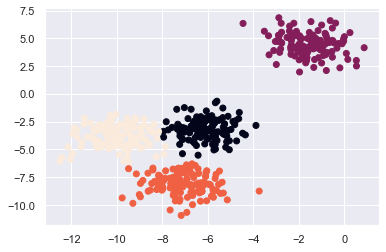

In [123]:
# Relación para nuestro umbral de distancia, controlando cuántos valores atípicos queremos detectar.
distance_threshold_ratio = 2.0

# Graficar la predicción
plt.scatter(X[:,0], X[:,1], c=y_pred)

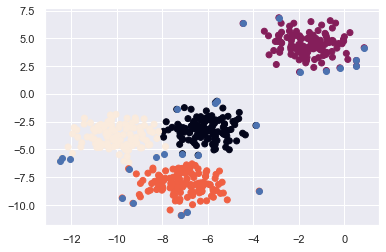

In [124]:
# Relación para nuestro umbral de distancia, controlando cuántos valores atípicos queremos detectar.
distance_threshold_ratio = 2.0

# Graficar la predicción
plt.scatter(X[:,0], X[:,1], c=y_pred)

# Para cada i-ésimo cluster, i=0~3
for i in [0, 1, 2, 3]:
    
    # Recuperar los índices de puntos de datos que pertenecen al i-ésimo clúster.
    indexs_of_X_in_ith_cluster = np.where(y_pred == i)[0]

    # Recuperar los puntos de datos por los índices
    X_in_ith_cluster = X[indexs_of_X_in_ith_cluster]
        
    # Recuperar los centroides.
    centroid = kmeans.cluster_centers_[i]
    
    # Calcular la distancia entre los puntos y el centroide.
    distances = np.sqrt(np.sum(np.square(X_in_ith_cluster - centroid), axis=1))
    
    # Calcular la distancia media para el grupo i-ésimo con el umbral de distancia.
    distance_threshold = np.mean(distances)
    
    # Recuperar los índices de valores atípicos en el clúster i.
    indexs_of_outlier = np.where(distances.flatten() > distance_threshold * distance_threshold_ratio)[0]
    
    # Recuperar valores atípicos en el clúster i por los índices
    outliers = X_in_ith_cluster[indexs_of_outlier]
    
    # Graficar los valores atípicos para cada i-ésimo cluster
    plt.scatter(outliers[:,0], outliers[:,1], c='b')

Como mencionamos acerca de la medición del análisis de calidad del clúster, puede ejecutar diferentes configuraciones de `distance_threshold_ratio` para encontrar la mejor calidad del clúster.

### K-means está limitado a los límites lineales del clúster

Los supuestos fundamentales del modelo de k-means (los puntos estarán más cerca de su propio centro de grupo que de otros) significa que el algoritmo a menudo será ineficaz si los grupos tienen geometrías complicadas.

En particular, los límites entre los clústeres de k-means siempre serán lineales, lo que significa que fallarán para los límites más complicados.

Considere los siguientes datos, junto con las etiquetas de clúster encontradas por el enfoque típico de k-medias:

In [125]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

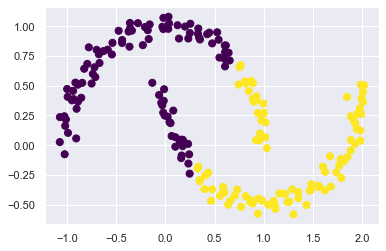

In [126]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Solución: Transformación del espacio de características / Utilización de Kernel

Una versión de este k-means kernelizado se implementa en Scikit-Learn dentro del estimador *SpectralClustering*. Utiliza el gráfico de los vecinos más cercanos para calcular una representación de mayor dimensión de los datos y luego asigna etiquetas mediante un algoritmo de k-means:

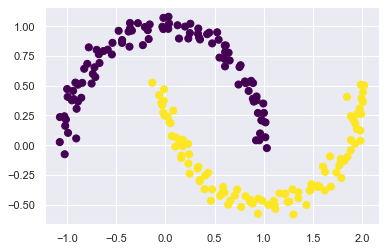

In [127]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Con este enfoque de transformación del kernel, el k-means kernelizado es capaz de encontrar los límites no lineales más complicados entre clústeres.

### K-means puede ser lento para un gran número de muestras

Debido a que cada iteración de k-means debe acceder a todos los puntos del conjunto de datos, el algoritmo puede ser relativamente lento a medida que aumenta el número de muestras. Para solucionar este problema, se puede usar un subconjunto de los datos para actualizar los centros del grupo en cada paso. Esta es la idea detrás de los algoritmos **k-means basados en lotes (batch-based k-means)**, uno de los cuales se implementa en *sklearn.cluster*.*MiniBatchKMeans*. 

### K-means no se puede utilizar para variables categóricas

Dado que k-means solo funciona cuando se define la media, los datos categóricos no pueden calcular el valor medio. En problemas de este tipo se debe utilizar **K-medoids**

## <font color='green'>Actividad 2</font>

Dado que los círculos concéntricos tendrían aproximadamente la misma media, entonces k-means no es adecuado para separarlos.

Generemos datos no esféricos y tracemos los grupos reales a los que deberían pertenecer.

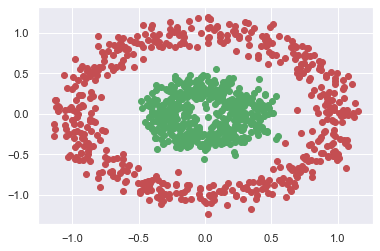

In [191]:
# Generar data
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

# Graficar
plt.plot(X[y == 0, 0], X[y == 0, 1], 'ro')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'go')

A partir de la gráfica sabemos que son círculos concéntricos, para poder aplicar K-means, debemos convertir sus coordenadas cartesianas (x-y) en coordenadas polares y usar solo el radio para el agrupamiento, ya que sabe que el ángulo theta no importa.

Utilice la siguiente función para convertir sus datos y aplicar K-means para realizar la clusterización.

```
def cart2pol(x, y):
    radius = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return radius, theta
```

1. Grafique el resultado de su transformación.
2. Grafique el resultado de su modelo K-means
3. Calcule las métricas de homogeneidad, completitud y Silhouette score.



In [192]:
display(X)
def cart2pol(x, y):
    radius = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return radius, theta

array([[-0.17123499, -0.36997196],
       [-0.20796054, -0.36370838],
       [-0.19184982, -0.19898755],
       ...,
       [ 0.5091099 , -0.98577303],
       [-0.54552294,  0.73876382],
       [-0.76155578,  0.71622807]])

In [193]:
x1 = []
y1 = []
for i in range(len(X)):
    x1.append(X[i][0])
    y1.append(X[i][1])
x1 = np.array(x1)
y1 = np.array(y1)

In [194]:
radius, theta = cart2pol(x1, y1)

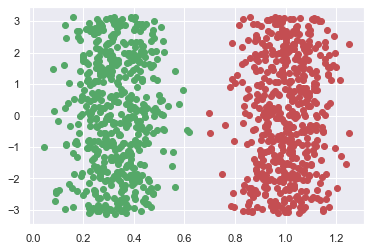

In [195]:
# 1.- Graficar

plt.plot(radius[y == 0], theta[y == 0], 'ro')
plt.plot(radius[y == 1], theta[y == 1], 'go')

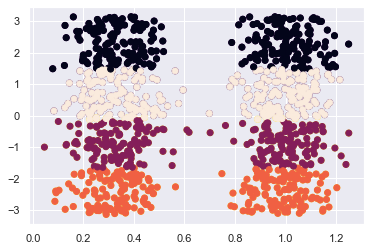

In [197]:
# Grafique el resultado de su modelo K-means

X = np.concatenate((radius[:,None], theta[:,None]), axis=1, out=None)

labels = Kmeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')

y_pred = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)



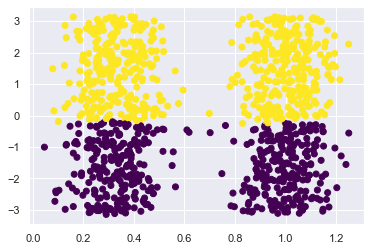

In [198]:
#Calcule las métricas de homogeneidad, completitud y Silhouette score.

from sklearn.cluster import SpectralClustering
 
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')

labels_two = model.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels_two, cmap='viridis')

<font color='green'>Fin Actividad 2</font>


## <font color='blue'>**Ejemplos de Uso de K-Means**</font>

## K-means Sobre Dígitos

**Ref: Este es un extracto de Python Data Science Handbook de Jake VanderPlas. El texto se publica bajo la licencia CC-BY-NC-ND y el código se publica bajo la licencia MIT**.

Aplicación de k-means en los datos de dígitos. Aquí se usará k-means para identificar dígitos similares sin usar la información de la etiqueta original; esto podría ser similar a un primer paso para extraer el significado de un nuevo conjunto de datos sobre el que no tiene información de etiqueta a priori.

Comenzaremos cargando los dígitos y luego encontrando los clústeres de KMeans. Recuerde que los dígitos consisten en 1,797 muestras con 64 características, donde cada una de las 64 características es el brillo de un píxel en una imagen de 8 × 8:

In [200]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [201]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

El resultado son 10 grupos en 64 dimensiones. Observe que los centros de los grupos en sí mismos son puntos de 64 dimensiones y pueden interpretarse como el dígito "típico" dentro del grupo. Veamos cómo se ven estos centros de clústeres:

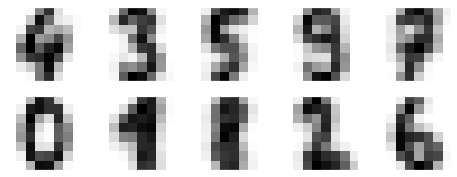

In [202]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Vemos que incluso sin las etiquetas, KMeans es capaz de encontrar grupos cuyos centros son dígitos reconocibles, quizás con la excepción del 1 y 8.

Como k-means no sabe nada sobre la identidad del clúster, las etiquetas 0–9 pueden permutarse. Podemos solucionar esto haciendo coincidir cada etiqueta de clúster aprendida con las etiquetas verdaderas que se encuentran en ellas:

In [203]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [204]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

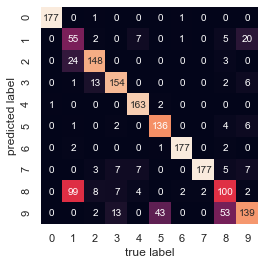

In [205]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Como podríamos esperar de los centros de los grupos que visualizamos antes, el principal punto de confusión es entre los ochos y los unos. ¡Pero esto todavía muestra que usando k-means, esencialmente podemos construir un clasificador de dígitos sin referencia a ninguna etiqueta conocida!

Podemos usar el algoritmo *t-distributed stochastic neighbor embedding* (t-SNE) para preprocesar los datos antes de realizar k-means. t-SNE es un algoritmo de incrustación no lineal que es particularmente hábil para preservar puntos dentro de clústeres. 

In [206]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.9348914858096828

## <font color='green'>Actividad 3</font>

## K-means para Compresión a Color

Una aplicación interesante de la agrupación en clústeres es la compresión de color dentro de las imágenes. Por ejemplo, imagina que tienes una imagen con millones de colores. En la mayoría de las imágenes, una gran cantidad de colores no se utilizarán y muchos de los píxeles de la imagen tendrán colores similares o incluso idénticos.

Por ejemplo, considere la imagen que se muestra en la siguiente figura, que es del módulo de conjuntos de datos de Scikit-Learn.

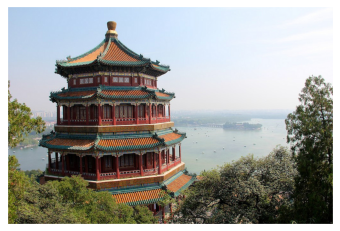

In [207]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

La imagen, se almacena en una matriz tridimensional de tamaño (alto, ancho, RGB), que contiene contribuciones de rojo, azul y verde como números enteros de 0 a 255:

In [208]:
china.shape

(427, 640, 3)

Una forma en que podemos ver este conjunto de píxeles es como una nube de puntos en un espacio de color tridimensional. Cambiaremos la forma de los datos a ``[n_samples x n_features]`` y cambiaremos la escala de los colores para que estén entre 0 y 1:

In [209]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

Podemos visualizar estos píxeles en este espacio de color, usando un subconjunto de 10,000 píxeles para mayor eficiencia:

In [210]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

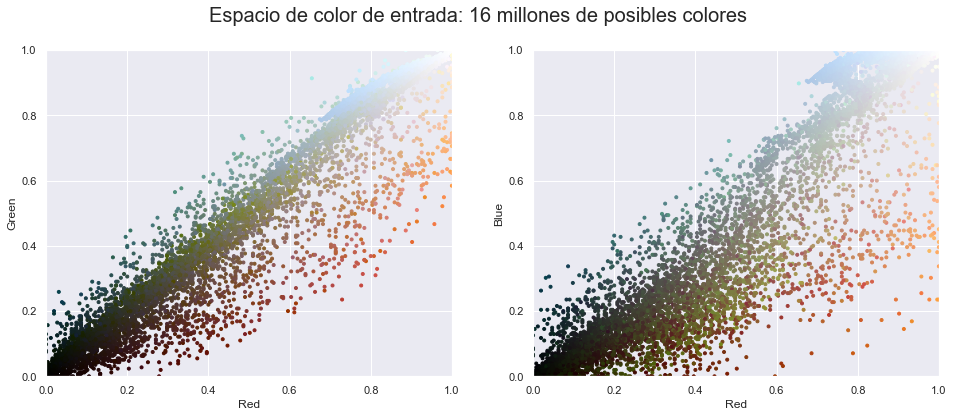

In [211]:
plot_pixels(data, title='Espacio de color de entrada: 16 millones de posibles colores')

In [238]:
# Cambio de valores de colores a 0 ~ 1
china = np.array(china, dtype=np.float64) / 255

In [240]:
# Transformar a array 2D
# Recordar que, w = 427 y h = 640
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

In [285]:
# 1.- Reduzca los 16 millones de colores de la imagen original a solo 16 colores utilizando K-means. 
# Debido a que es una base de datos muy grande, utilice mini batch k-means.

from sklearn.cluster import MiniBatchKMeans

model = MiniBatchKMeans(n_clusters = 16, batch_size = 255)
kmeans = model.fit(image_array)
labels = kmeans.predict(image_array)

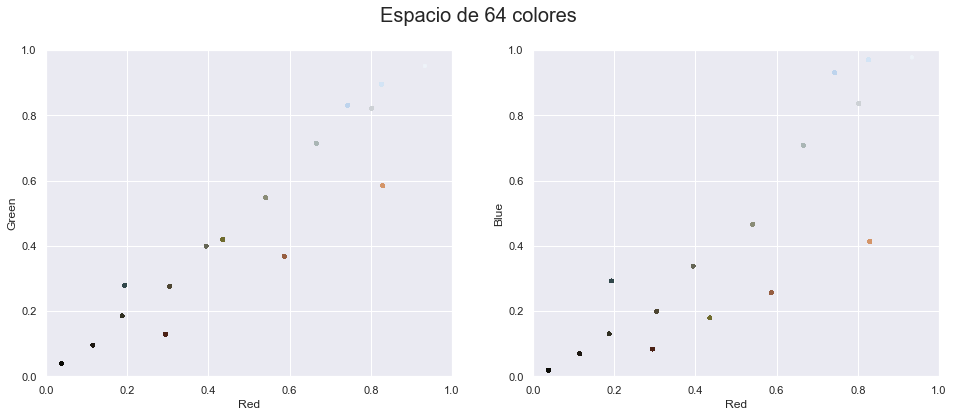

In [286]:
# Grafique el nuevo espacio de colores.

plot_pixels(kmeans.cluster_centers_[labels], title='Espacio de 64 colores')

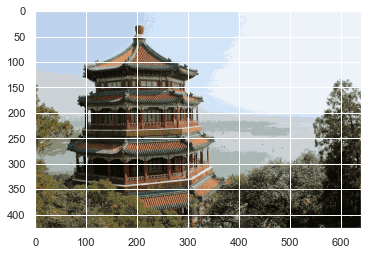

In [288]:
# Grafique la imagen resultante de este proceso de compresión.

plt.imshow(kmeans.cluster_centers_[labels].reshape( 427 , 640 ,-1))

1. Reduzca los 16 millones de colores de la imagen original a solo 16 colores utilizando K-means. Debido a que es una base de datos muy grande, utilice **mini batch k-means**.
2. Grafique el nuevo espacio de colores.
3. Grafique la imagen resultante de este proceso de compresión.

<font color='green'>Fin Actividad 3</font>
